#Pothole Detection System



The Pothole Detection System is an intelligent, vision-based solution leveraging deep learning and computer vision to automatically identify road surface anomalies with high precision. Unlike traditional manual inspections, this system ensures real-time, scalable monitoring using trained YOLO models on diverse datasets. It empowers civic bodies with actionable insights to prioritize repairs, improve road safety, and optimize maintenance resources. Designed for urban infrastructure resilience, the system integrates seamlessly with GIS platforms and mobile/web dashboards. Its adaptability to different terrains and lighting conditions makes it a cutting-edge asset for smart city initiatives.











#YOLO


YOLO (You Only Look Once) is a real-time object detection algorithm that identifies and localizes multiple objects within an image in a single pass through the neural network. Unlike traditional methods that require multiple stages, YOLO processes the entire image at once, making it extremely fast and efficient. It divides the image into a grid and predicts bounding boxes and class probabilities for each cell simultaneously. This unified architecture makes YOLO ideal for time-sensitive applications like autonomous driving and surveillance. Its latest versions (YOLOv5, YOLOv8, etc.) offer enhanced accuracy, speed, and model flexibility.

#Pothole Detection using YOLO

In this file I am developing an intelligent Pothole Detection System using the YOLO (You Only Look Once) object detection algorithm to enhance road safety and infrastructure monitoring. By leveraging YOLO's real-time image processing capabilities, the system can accurately detect and localize potholes from road images or video feeds in a single pass. The process involves collecting and annotating a diverse dataset, training the YOLO model for high-precision detection, and deploying it on edge devices or integrated dashboards. This solution replaces manual inspections with automated, scalable monitoring—empowering authorities with timely insights for maintenance planning. Its speed, accuracy, and adaptability make it a valuable tool for smart transportation systems.

#Workflow

Now, Below are the some steps which i have initiated to execute the process and making of the model.

#Step 1

#Mounting The Google Drive

In the very first step, i have started to import google drive and provide access to drive account to get properly mounted and the content gets properly located into it.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


#Step 2

#Setting Up Path

In the second step of workflow of a project there is a process of path settlement in the located drive folder.

In [ ]:
%cd /content/gdrive//MyDrive

/content/gdrive/MyDrive


In [ ]:
import os

if not os.path.isdir("PotholeDetection"):
  os.makedirs("PotholeDetection")

In [ ]:
%cd PotholeDetection/

/content/gdrive/MyDrive/PotholeDetection


#Step 3

Now, In the third step consecutively we have to install some libraries because as we know we are doing the project in python so it gives an advantage of in-built libraries which i have mentioned in the text file named as "requirements.txt"

File Location :- https://github.com/Itz-Piyush/Pothole_Detection_tict/blob/main/requirements.txt

In [ ]:
!pip install -r requirements.txt

#Step 4

#Downloading and Unzipping The Data Set

Now coming to the fourth step there is a process of downloading and unzipping of datasets.

Note: Keep in mind that those installed datasets after unzipping it must kept into that located drive folder.

In [ ]:
#!curl -L "https://public.roboflow.com/ds/aRrz6zPbpi?key=CrAI5qIpej" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
#!wget https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8x.pt
#! mkdir v-test
#! mv train/ v-test/
#! mv valid/ v-test/
#! mv test/ v-test/

#Step 5

#Training & Creating the Model

Now, It is the time to start creating the model and trained it with the datasets which you have downloaded and located.

In this process we have to install ultralytics because it is the official creator and maintainer of the YOLOv5 and YOLOv8 models—cutting-edge object detection frameworks known for their speed, accuracy, and ease of use. Built on PyTorch, Ultralytics provides a user-friendly interface, powerful training tools, and seamless deployment options, making it a go-to platform for developing real-time AI vision applications across industries.

Afterwards, OpenCV (Open Source Computer Vision Library) is a widely used open-source library that provides a comprehensive suite of tools for image and video processing, machine learning, and computer vision tasks. With support for multiple programming languages like Python and C++, OpenCV enables developers to build efficient, real-time applications such as facial recognition, object tracking, and edge detection with ease.











In [ ]:
!pip install ultralytics
!pip install opencv-python

#Step 6

Coming to the sixth step of the project workflow which states that some few points to be considered to train the model.

1. A "data.yaml" file should be created prior of execution.
2. A pretrained model you have to use to start training on the basis of current datasets.
3. Validate and Export the data after training which has been based on the concept that is 80% of data of datastes will be used for epochs in the training while 20% is used for testing.

In [ ]:
from ultralytics import YOLO
from google.colab import files
import io

# Step 1: Upload data.yaml
uploaded = files.upload()
data_yaml_filename = list(uploaded.keys())[0]

# Step 2: Save the uploaded content directly to disk
with open(data_yaml_filename, 'wb') as f:
    f.write(uploaded[data_yaml_filename])

# Step 3: Train using the filepath (not the dict!)
model = YOLO("yolov8x.pt")  # load pretrained model
model.train(data=data_yaml_filename, epochs=100)  # pass the filename directly

# Step 4: Validate and export
metrics = model.val()
success = model.export(format="onnx")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Saving data.yaml to data (2).yaml
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data (2).yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

100%|██████████| 755k/755k [00:00<00:00, 15.5MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              


  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280, 640, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /content/gdrive/MyDrive/PotholeDetection/train/labels.cache... 465 images, 0 backgrounds, 0 corrupt: 100%|██████████| 465/465 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 2.4±3.2 ms, read: 5.1±10.8 MB/s, size: 72.5 KB)


val: Scanning /content/gdrive/MyDrive/PotholeDetection/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      11.8G      1.753      3.234      1.762          2        640: 100%|██████████| 30/30 [00:36<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        133        330      0.028      0.127     0.0141    0.00749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      12.6G      1.824       2.19      1.812          3        640: 100%|██████████| 30/30 [00:37<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        133        330    0.00207    0.00303    0.00106   0.000317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      12.3G      1.917      2.306       1.89          2        640: 100%|██████████| 30/30 [00:44<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        133        330   5.01e-05    0.00606   2.59e-05    6.6e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      12.2G      1.926       2.15      1.897          6        640: 100%|██████████| 30/30 [00:44<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        133        330   0.000219     0.0242   0.000113   5.25e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      12.3G      1.911      2.135      1.852          7        640: 100%|██████████| 30/30 [00:42<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        133        330   7.53e-05    0.00909    3.8e-05   1.26e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      12.5G      1.743      1.955      1.774          1        640: 100%|██████████| 30/30 [00:43<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        133        330     0.0123      0.106     0.0035    0.00146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      12.3G      1.764      1.928      1.758          6        640: 100%|██████████| 30/30 [00:43<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        133        330     0.0445     0.0303    0.00664    0.00315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      12.6G      1.718      1.913      1.734          1        640: 100%|██████████| 30/30 [00:43<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        133        330      0.354      0.281      0.254      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      12.4G      1.661      1.763      1.693          9        640: 100%|██████████| 30/30 [00:50<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        133        330      0.447      0.306      0.315      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      12.5G      1.677      1.746      1.661          9        640: 100%|██████████| 30/30 [00:48<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        133        330      0.342      0.191      0.176     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      12.4G      1.628      1.689      1.648          9        640: 100%|██████████| 30/30 [00:43<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        133        330      0.468      0.264      0.262      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      12.6G      1.627      1.675       1.64         28        640: 100%|██████████| 30/30 [00:43<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        133        330       0.46      0.397      0.403      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      12.4G      1.546      1.549      1.582         10        640: 100%|██████████| 30/30 [00:49<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        133        330      0.635      0.467      0.528      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      12.6G      1.542      1.656      1.629          1        640: 100%|██████████| 30/30 [00:49<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        133        330       0.55      0.489      0.467      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      12.4G      1.538       1.53      1.601          4        640: 100%|██████████| 30/30 [00:43<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        133        330      0.492      0.467      0.478      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      12.6G      1.525      1.471      1.575          7        640: 100%|██████████| 30/30 [00:43<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        133        330      0.615      0.467      0.511      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      12.4G      1.503      1.498      1.583          2        640: 100%|██████████| 30/30 [00:48<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        133        330       0.62       0.51      0.548      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      12.5G      1.494      1.422       1.56         10        640: 100%|██████████| 30/30 [00:48<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        133        330      0.651      0.497      0.563      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      12.4G      1.467      1.475      1.539          6        640: 100%|██████████| 30/30 [00:49<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        133        330      0.662      0.487      0.587      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      12.6G      1.478      1.456      1.582          2        640: 100%|██████████| 30/30 [00:48<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        133        330      0.619        0.5      0.544      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      12.3G      1.447      1.388      1.545          2        640: 100%|██████████| 30/30 [00:44<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        133        330      0.594      0.561      0.612      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      12.6G      1.436      1.372      1.524          4        640: 100%|██████████| 30/30 [00:49<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        133        330      0.616      0.585      0.621      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      12.4G      1.427      1.307       1.52          3        640: 100%|██████████| 30/30 [00:43<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        133        330      0.665      0.527      0.613      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      12.6G      1.406      1.285      1.492          8        640: 100%|██████████| 30/30 [00:43<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        133        330      0.658      0.536      0.599      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      12.3G      1.366      1.225      1.467          3        640: 100%|██████████| 30/30 [00:42<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]


                   all        133        330      0.627      0.585      0.626      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      12.5G      1.394      1.281      1.486          7        640: 100%|██████████| 30/30 [00:49<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        133        330      0.674      0.521      0.584      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      12.3G      1.359      1.249      1.479          7        640: 100%|██████████| 30/30 [00:43<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]


                   all        133        330      0.625      0.494      0.548      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      12.5G       1.37      1.224      1.446          3        640: 100%|██████████| 30/30 [00:43<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        133        330      0.704      0.532      0.582      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      12.3G      1.336       1.22      1.446          2        640: 100%|██████████| 30/30 [00:43<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        133        330      0.654      0.482      0.591      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      12.5G       1.33      1.251      1.456          1        640: 100%|██████████| 30/30 [00:44<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        133        330      0.679      0.558      0.625      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      12.4G       1.36      1.185      1.467          2        640: 100%|██████████| 30/30 [00:43<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        133        330       0.69      0.597      0.661       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      12.6G        1.3      1.219      1.452          1        640: 100%|██████████| 30/30 [00:49<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


                   all        133        330      0.679      0.606      0.656      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      12.3G       1.34      1.156      1.477          3        640: 100%|██████████| 30/30 [00:43<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        133        330      0.736      0.594      0.672      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      12.6G      1.252      1.069      1.378         11        640: 100%|██████████| 30/30 [00:49<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        133        330      0.726      0.612      0.682      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      12.3G      1.322      1.192      1.474          3        640: 100%|██████████| 30/30 [00:49<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        133        330      0.682      0.619       0.62      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      12.6G      1.268       1.21      1.415          1        640: 100%|██████████| 30/30 [00:43<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        133        330      0.692      0.633      0.701      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      12.4G      1.285      1.225      1.424          1        640: 100%|██████████| 30/30 [00:49<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        133        330      0.741      0.625      0.682      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      12.6G      1.255      1.046      1.388          2        640: 100%|██████████| 30/30 [00:42<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        133        330      0.769      0.527       0.63      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      12.4G      1.214      1.007      1.368          2        640: 100%|██████████| 30/30 [00:43<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        133        330      0.732      0.653      0.716      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      12.6G      1.224      1.014      1.373         12        640: 100%|██████████| 30/30 [00:49<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        133        330      0.713      0.616      0.681      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      12.4G      1.183     0.9762      1.326          4        640: 100%|██████████| 30/30 [00:44<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        133        330      0.733      0.632      0.704      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      12.5G      1.236      1.034      1.396          2        640: 100%|██████████| 30/30 [00:43<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        133        330       0.73      0.583      0.658       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      12.3G      1.248      1.022       1.41          6        640: 100%|██████████| 30/30 [00:42<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        133        330       0.71      0.623      0.686      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      12.5G      1.189      1.007      1.343          5        640: 100%|██████████| 30/30 [00:43<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        133        330      0.722      0.561      0.662      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      12.4G      1.137     0.9417      1.325          4        640: 100%|██████████| 30/30 [00:43<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        133        330      0.748      0.615      0.679      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      12.6G      1.143     0.9167      1.314          3        640: 100%|██████████| 30/30 [00:42<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        133        330      0.721      0.602       0.67      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      12.4G       1.11     0.8944      1.288          1        640: 100%|██████████| 30/30 [00:43<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        133        330      0.772      0.594      0.702      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      12.5G      1.169     0.8971      1.333          7        640: 100%|██████████| 30/30 [00:48<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        133        330      0.766      0.625      0.725      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      12.4G      1.155      0.944       1.34          1        640: 100%|██████████| 30/30 [00:43<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        133        330      0.673      0.667      0.707      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      12.5G      1.165     0.9413      1.346          3        640: 100%|██████████| 30/30 [00:44<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        133        330      0.782      0.603      0.718      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      12.4G      1.163     0.9053      1.305          1        640: 100%|██████████| 30/30 [00:42<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        133        330        0.7      0.676      0.713      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      12.6G      1.149      0.913      1.318          2        640: 100%|██████████| 30/30 [00:48<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        133        330      0.711      0.625      0.685      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      12.3G      1.112     0.8939      1.293          3        640: 100%|██████████| 30/30 [00:43<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        133        330      0.774      0.664      0.747      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      12.5G      1.097     0.8457      1.273          4        640: 100%|██████████| 30/30 [00:49<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        133        330      0.705      0.673      0.691      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      12.3G      1.107     0.9299      1.291          1        640: 100%|██████████| 30/30 [00:43<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        133        330      0.733      0.606       0.69      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.6G      1.063     0.8566      1.271          1        640: 100%|██████████| 30/30 [00:43<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        133        330      0.725      0.664      0.726      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      12.4G      1.072      0.836      1.295          6        640: 100%|██████████| 30/30 [00:43<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        133        330      0.696      0.664      0.699      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      12.6G      1.067     0.8045      1.257         12        640: 100%|██████████| 30/30 [00:42<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        133        330      0.738      0.633      0.714       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      12.3G       1.05      0.791      1.261          2        640: 100%|██████████| 30/30 [00:43<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        133        330      0.817      0.664      0.728      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      12.6G      1.033      0.805      1.243         16        640: 100%|██████████| 30/30 [00:43<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        133        330      0.802      0.624      0.735      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      12.3G      1.052     0.8013      1.262          6        640: 100%|██████████| 30/30 [00:42<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]


                   all        133        330      0.826      0.624      0.738       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      12.6G      1.005     0.7559      1.214         10        640: 100%|██████████| 30/30 [00:49<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        133        330      0.774      0.667       0.73      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      12.3G      1.011      0.797       1.24          3        640: 100%|██████████| 30/30 [00:43<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        133        330      0.719      0.636      0.701      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      12.5G      1.015     0.7867      1.232          8        640: 100%|██████████| 30/30 [00:42<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        133        330      0.686      0.676      0.722      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      12.4G      1.037     0.7848      1.294          2        640: 100%|██████████| 30/30 [00:43<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        133        330      0.795       0.67      0.752      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      12.6G      1.014     0.7147      1.249          2        640: 100%|██████████| 30/30 [00:42<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        133        330      0.815      0.648      0.751      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      12.4G      1.034     0.7372      1.276          1        640: 100%|██████████| 30/30 [00:48<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        133        330      0.779      0.606      0.727      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      12.6G     0.9838     0.7163        1.2          4        640: 100%|██████████| 30/30 [00:42<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        133        330      0.758      0.658      0.723      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      12.3G      1.012     0.7268      1.231          1        640: 100%|██████████| 30/30 [00:43<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        133        330      0.769      0.652      0.727       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      12.6G      1.008     0.7491      1.263          2        640: 100%|██████████| 30/30 [00:43<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        133        330      0.832      0.648      0.747      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      12.4G     0.9725      0.715      1.221         14        640: 100%|██████████| 30/30 [00:48<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        133        330      0.739      0.703      0.757      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      12.6G     0.9192      0.672      1.154          8        640: 100%|██████████| 30/30 [00:43<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        133        330       0.76      0.706       0.75       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      12.4G     0.8889     0.6371      1.142         11        640: 100%|██████████| 30/30 [00:43<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


                   all        133        330       0.74      0.673      0.732      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      12.6G     0.9609     0.7979      1.169          1        640: 100%|██████████| 30/30 [00:43<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        133        330      0.829      0.633      0.755      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      12.4G      0.902      0.642      1.172          7        640: 100%|██████████| 30/30 [00:43<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        133        330      0.853       0.65      0.769      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      12.6G        0.9     0.6642      1.169          4        640: 100%|██████████| 30/30 [00:47<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        133        330      0.771      0.652       0.74      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      12.4G     0.9031     0.6446      1.148          5        640: 100%|██████████| 30/30 [00:44<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        133        330      0.852      0.643       0.76      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      12.6G     0.9175     0.6702      1.158         12        640: 100%|██████████| 30/30 [00:47<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        133        330      0.811      0.639      0.744      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      12.3G     0.8989      0.716      1.142          1        640: 100%|██████████| 30/30 [00:44<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        133        330      0.817      0.658      0.762      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      12.5G     0.8425     0.6034      1.124          4        640: 100%|██████████| 30/30 [00:48<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        133        330      0.797      0.664      0.773      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      12.4G      0.879     0.7326      1.156          1        640: 100%|██████████| 30/30 [00:49<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        133        330      0.788      0.687      0.756      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      12.5G     0.8553     0.6055      1.125          6        640: 100%|██████████| 30/30 [00:43<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        133        330      0.869      0.655      0.783      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      12.4G     0.8221     0.6065      1.116          3        640: 100%|██████████| 30/30 [00:42<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        133        330      0.809      0.697      0.775      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      12.5G     0.8363     0.5905      1.104          2        640: 100%|██████████| 30/30 [00:48<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

                   all        133        330       0.79      0.667      0.763      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      12.4G     0.8305     0.5889      1.116         11        640: 100%|██████████| 30/30 [00:43<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        133        330      0.887      0.642      0.787      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      12.5G     0.8418     0.6173      1.151          3        640: 100%|██████████| 30/30 [00:49<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        133        330      0.885      0.633      0.776      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      12.4G     0.8279     0.5943      1.111          6        640: 100%|██████████| 30/30 [00:43<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        133        330       0.84      0.651      0.762      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      12.5G     0.8226     0.5804      1.105          2        640: 100%|██████████| 30/30 [00:42<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        133        330      0.802      0.688       0.78      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      12.4G     0.8255     0.6067      1.122          1        640: 100%|██████████| 30/30 [00:43<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        133        330      0.798      0.684      0.772      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      12.5G     0.7913     0.5892        1.1         14        640: 100%|██████████| 30/30 [00:42<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


                   all        133        330      0.793      0.679      0.775      0.492
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      12.3G     0.7802     0.5859      1.095          1        640: 100%|██████████| 30/30 [00:43<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        133        330       0.86      0.635      0.756      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      12.6G     0.7049     0.4869      1.025          3        640: 100%|██████████| 30/30 [00:43<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        133        330       0.82       0.67      0.771      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      12.4G     0.6944      0.485      1.015          6        640: 100%|██████████| 30/30 [00:43<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        133        330       0.75      0.712       0.77      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      12.5G     0.6596     0.4297          1          5        640: 100%|██████████| 30/30 [00:42<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        133        330      0.845      0.658      0.769      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      12.4G     0.6825     0.4777      1.021          3        640: 100%|██████████| 30/30 [00:43<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        133        330      0.817      0.677      0.768        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      12.5G     0.6558     0.4521      1.005          1        640: 100%|██████████| 30/30 [00:42<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        133        330      0.797      0.694      0.775      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      12.3G     0.6472     0.4746       1.02          1        640: 100%|██████████| 30/30 [00:43<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        133        330      0.818      0.697      0.789      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      12.5G     0.6384     0.4092     0.9777          2        640: 100%|██████████| 30/30 [00:48<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        133        330      0.812      0.709      0.786       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      12.4G     0.6232     0.4125      0.974          1        640: 100%|██████████| 30/30 [00:48<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        133        330       0.83      0.682      0.784      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      12.5G     0.6159     0.3933     0.9706          2        640: 100%|██████████| 30/30 [00:42<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        133        330      0.813      0.696      0.782      0.502



100 epochs completed in 1.467 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 136.7MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,125,494 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]


                   all        133        330      0.813      0.709      0.786      0.509
               pothole        133        330      0.813      0.709      0.786      0.509
Speed: 0.2ms preprocess, 25.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train5
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,125,494 parameters, 0 gradients, 257.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 21.0±6.7 MB/s, size: 50.3 KB)


val: Scanning /content/gdrive/MyDrive/PotholeDetection/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.15s/it]


                   all        133        330      0.809      0.707      0.786      0.509
               pothole        133        330      0.809      0.707      0.786      0.509
Speed: 4.4ms preprocess, 59.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train52
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/detect/train5/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (130.4 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.53', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 5.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with on

In [ ]:
from ultralytics import YOLO

print("Ultralytics imported successfully")


Ultralytics imported successfully


#Step 7

In this process you have to load the trained model by providing the path of the model which you can only get after completion of phase of training.

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
from pathlib import Path
#from google.colab import files
#import io
#uploaded = files.upload()
#pt_file = list(uploaded.keys())[0]
#with open(pt_file, 'wb') as f:
    #f.write(uploaded[pt_file])
model = YOLO("/content/gdrive/MyDrive/PotholeDetection/runs/detect/train5/weights/best.pt")  # Load your trained model
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)[0]  # Get the first result

    # Draw boxes and labels directly
    annotated_frame = results.plot()

    cv2.imshow("Pothole Detection", annotated_frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
#cv2.destroyAllWindows()


#Step 8

#Testing

At the 8th step of the project workflow there is a process of testing of model to verify that the model is completely working correctly or not.

In this process, I have created a function for detection of pothole on the roads by providing an image by the user which consisted of some potholes and it will get detected by the model with the proper outcome.

Saving pot1.jpg to pot1 (1).jpg

0: 448x640 1 pothole, 73.0ms
Speed: 2.6ms preprocess, 73.0ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


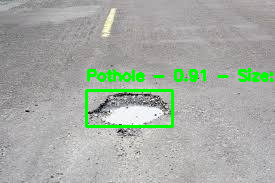

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load your trained YOLO model
model = YOLO("/content/gdrive/MyDrive/PotholeDetection/runs/detect/train5/weights/best.pt")

# Function to calculate pothole size in pixels
def calculate_pothole_size(box, image_width, image_height):
    x1, y1, x2, y2 = box
    width = x2 - x1
    height = y2 - y1
    # Assuming square pixels, size is area
    size_pixels = width * height
    return size_pixels

# Upload the image
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read the image
img = cv2.imread(image_path)
image_height, image_width, _ = img.shape

# Perform inference
results = model(img,conf=0.4)

# Get the first result (assuming only one image is processed)
result = results[0]

# Loop through detections and annotate the image
for *box, conf, cls in result.boxes.data.tolist():
    x1, y1, x2, y2 = map(int, box)  # Get box coordinates as integers

    # Calculate pothole size
    pothole_size = calculate_pothole_size(box, image_width, image_height)

    min_size=100
    max_size=10000
    if min_size<=pothole_size<=max_size:
    # Draw bounding box and label
      cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
      label = f"Pothole - {conf:.2f} - Size: {pothole_size} pixels"
      cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the annotated image
cv2_imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#Step 9

In this final step the outcome of the model detection will get saved into the tested folder and then moved towards the predicted folder.

In [ ]:
!yolo task=detect mode=predict model={"/content/gdrive/MyDrive/PotholeDetection/runs/detect/train5/weights/best.pt"} source="pot1 (1).jpg" save=True conf=0.4

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 112 layers, 68,125,494 parameters, 0 gradients, 257.4 GFLOPs

image 1/1 /content/gdrive/MyDrive/PotholeDetection/pot1 (1).jpg: 448x640 1 pothole, 2512.2ms
Speed: 2.2ms preprocess, 2512.2ms inference, 20.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


#Step 10

Go to the repository of the project to see the hosting of the model by using streamlit.

Github Project Repository :- https://github.com/Itz-Piyush/Pothole_Detection_tict/blob/main/app.py